In [1]:
print("I am VSP")

I am VSP


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from nltk.stem import WordNetLemmatizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('C:/Users/prana/Desktop/Capstone/Dataset.json') as botdata:
    gd =  json.load(botdata)

In [4]:
gd

{'intents': [{'tag': 'greeting',
   'input': ['hello', 'hi', 'hey', 'hey there', "how's it going"],
   'response': ['hola',
    'hi, how are you',
    'all good, how about you',
    "what's up"]},
  {'tag': 'about pace',
   'input': ['i want to know about pace',
    'how is pace university',
    'about pace university'],
   'response': ['please go through the following link https://www.pace.edu/about-pace']},
  {'tag': 'international admission',
   'input': ['i have a question regarding international admission',
    'i need some more information on international admission'],
   'response': ['please go through the following link https://www.pace.edu/admission-and-aid/international-admission']},
  {'tag': 'contact international admission',
   'input': ['i want to contact international admission',
    'i want to talk to international admission'],
   'response': ['please go through the following link https://www.pace.edu/admission-and-aid/international-admission/contact-international-admis

In [5]:
tags = []
inputs = []
responses = {}
for i in gd['intents']:
    responses[i['tag']]=i['response']
    for j in i['input']:
        inputs.append(j)
        tags.append(i['tag'])

In [6]:
responses

{'greeting': ['hola',
  'hi, how are you',
  'all good, how about you',
  "what's up"],
 'about pace': ['please go through the following link https://www.pace.edu/about-pace'],
 'international admission': ['please go through the following link https://www.pace.edu/admission-and-aid/international-admission'],
 'contact international admission': ['please go through the following link https://www.pace.edu/admission-and-aid/international-admission/contact-international-admission'],
 'apply': ['please go through the following link https://www.pace.edu/apply-now'],
 'student advising': ['please go through the following link https://www.pace.edu/academic-advising/student-advising this link has information based on which school you have been admitted to'],
 'learning commons': ["learning commons is the place you're looking for please go through the following link https://www.pace.edu/learning-commons/current-students"],
 'career services': ['please go through the following link https://www.pac

In [7]:
df_bot = pd.DataFrame({"inputs": inputs, "tags": tags})
df_bot

,inputs,tags
0,hello,greeting
1,hi,greeting
2,hey,greeting
3,hey there,greeting
4,how's it going,greeting
5,i want to know about pace,about pace
6,how is pace university,about pace
7,about pace university,about pace
8,i have a question regarding international admi...,international admission
9,i need some more information on international ...,international admission


In [8]:
df_bot = df_bot.sample(frac=1)

# Pre Processing

In [9]:
# removing punctuations
import string
df_bot['inputs'] = df_bot['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df_bot['inputs'] = df_bot['inputs'].apply(lambda wrd: ''.join(wrd))
df_bot

,inputs,tags
10,i want to contact international admission,contact international admission
34,what courses do pace offer,find your program
36,i want to know more about my course,find your program
49,life at pace,campus life
17,who is my advisor,student advising
21,can someone assist me with tutoring,learning commons
56,that was helpful,thanks
22,i want assistance with my resume,career services
6,how is pace university,about pace
23,what is career services,career services


# Tokenizing

In [10]:
# Tokenize the data 
tokneizer = Tokenizer(num_words=400)
tokneizer.fit_on_texts(df_bot['inputs'])
train = tokneizer.texts_to_sequences(df_bot['inputs'])
train

[[1, 4, 3, 7, 18, 19],
 [27, 33, 20, 2, 34],
 [1, 4, 3, 12, 35, 21, 5, 48],
 [28, 9, 2],
 [22, 8, 5, 13],
 [10, 49, 50, 51, 14, 36],
 [52, 53, 54],
 [1, 4, 37, 14, 5, 55],
 [6, 8, 2, 38],
 [27, 8, 23, 15],
 [1, 39, 56, 40, 5, 57],
 [41, 58],
 [6, 20, 1, 59, 60, 2],
 [61, 62],
 [1, 11, 16, 17, 42, 63, 29],
 [7, 30, 24, 31],
 [1, 4, 3, 64, 2],
 [65],
 [1, 11, 25, 14, 66, 43, 26, 67],
 [10, 1, 68, 26, 44, 9, 2],
 [32, 32],
 [1, 11, 16, 17, 42, 69, 29],
 [1, 11, 25, 14, 36],
 [1, 4, 3, 7, 45, 70],
 [6, 71, 72, 9, 2],
 [6, 8, 46, 3, 73, 9, 2],
 [1, 11, 16, 17, 27, 33, 74, 2, 34],
 [6, 10, 1, 7, 5, 13],
 [1, 4, 26, 44, 9, 2],
 [41],
 [10, 1, 12, 22, 8, 5, 13],
 [6, 10, 1, 7, 30, 24, 31],
 [75, 28, 9, 2],
 [1, 39, 26, 76, 40, 18, 19],
 [32],
 [77],
 [78],
 [6, 8, 28, 9, 2],
 [6, 20, 1, 79, 3, 23, 15],
 [1, 4, 3, 12, 22, 8, 5, 80, 13],
 [81, 46, 82],
 [83, 5, 29],
 [7, 16, 24, 30, 24, 31],
 [1, 4, 3, 12, 21, 23, 15],
 [47, 3, 2],
 [1, 11, 84, 35, 16, 17, 18, 19],
 [6, 20, 1, 47, 3, 2],
 [10, 1

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

In [12]:
x_train

array([[ 0,  0,  0,  1,  4,  3,  7, 18, 19],
       [ 0,  0,  0,  0, 27, 33, 20,  2, 34],
       [ 0,  1,  4,  3, 12, 35, 21,  5, 48],
       [ 0,  0,  0,  0,  0,  0, 28,  9,  2],
       [ 0,  0,  0,  0,  0, 22,  8,  5, 13],
       [ 0,  0,  0, 10, 49, 50, 51, 14, 36],
       [ 0,  0,  0,  0,  0,  0, 52, 53, 54],
       [ 0,  0,  0,  1,  4, 37, 14,  5, 55],
       [ 0,  0,  0,  0,  0,  6,  8,  2, 38],
       [ 0,  0,  0,  0,  0, 27,  8, 23, 15],
       [ 0,  0,  0,  1, 39, 56, 40,  5, 57],
       [ 0,  0,  0,  0,  0,  0,  0, 41, 58],
       [ 0,  0,  0,  6, 20,  1, 59, 60,  2],
       [ 0,  0,  0,  0,  0,  0,  0, 61, 62],
       [ 0,  0,  1, 11, 16, 17, 42, 63, 29],
       [ 0,  0,  0,  0,  0,  7, 30, 24, 31],
       [ 0,  0,  0,  0,  1,  4,  3, 64,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 65],
       [ 0,  1, 11, 25, 14, 66, 43, 26, 67],
       [ 0,  0, 10,  1, 68, 26, 44,  9,  2],
       [ 0,  0,  0,  0,  0,  0,  0, 32, 32],
       [ 0,  0,  1, 11, 16, 17, 42, 69, 29],
       [ 0

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(df_bot['tags'])

In [14]:
y_train

array([ 7, 10, 10,  4, 17, 13, 18,  5,  0,  5, 16, 11,  2,  3,  1, 14, 15,
       11, 14, 15,  3,  1, 13,  9,  1,  4, 10, 17, 15, 11, 17,  8,  4, 12,
        3, 11,  3,  4,  6, 17, 11, 10,  8,  5,  2, 12,  2,  9, 16, 18, 18,
        0,  6, 16,  7,  0, 17])

In [15]:
input_shape = x_train.shape[1]
print(input_shape)

9


In [16]:
vocab = len(tokneizer.word_index)
vocab

93

In [17]:
output_length = le.classes_.shape[0]
output_length

19

# Neural Network

In [18]:
# model

l1 = Input(shape=(input_shape,))
l2 = Embedding(vocab+1,10)(l1)
l2 = LSTM(10,return_sequences=True)(l2)
l2 = Flatten()(l2)
l2 = Dense(output_length,activation="softmax")(l2)
model = Model(l1,l2)

# different architectures are available so use different

In [19]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 embedding (Embedding)       (None, 9, 10)             940       
                                                                 
 lstm (LSTM)                 (None, 9, 10)             840       
                                                                 
 flatten (Flatten)           (None, 90)                0         
                                                                 
 dense (Dense)               (None, 19)                1729      
                                                                 
Total params: 3,509
Trainable params: 3,509
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Training the model
train = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 5ms/step - loss: 2.9480 - accuracy: 0.0351
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 2.9281 - accuracy: 0.1404
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 2.9076 - accuracy: 0.1930
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 2.8817 - accuracy: 0.1930
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 2.8496 - accuracy: 0.1754
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 2.8024 - accuracy: 0.1754
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 2.7450 - accuracy: 0.1754
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 2.6845 - accuracy: 0.1754
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 2.6072 - accuracy: 0.2105
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 2.5299 - accuracy: 0.2105
Epoch 11/50
2/2 [======================

# Model Analysis

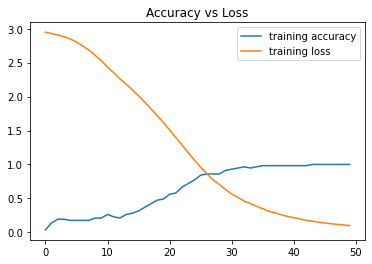

In [22]:
plt.plot(train.history['accuracy'],label = 'training accuracy')
plt.plot(train.history['loss'],label = 'training loss')
plt.title('Accuracy vs Loss')
plt.legend()

In [23]:
# Testing
import random

while True:
    text = []
    prediction_input = input('You : ')
    
    #removing puntucations
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    text.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokneizer.texts_to_sequences(text)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag & predicting
    response_tag = le.inverse_transform([output])[0]
    print("Grut : ", random.choice(responses[response_tag]))
    if response_tag == "bye":
        break

You : hi
1/1 [==============================] - 0s 265ms/step
Grut :  hola
You : i want to know about pace
1/1 [==============================] - 0s 16ms/step
Grut :  please go through the following link https://www.pace.edu/about-pace
You : i want to contact international admission
1/1 [==============================] - 0s 16ms/step
Grut :  please go through the following link https://www.pace.edu/admission-and-aid/international-admission/contact-international-admission
You : how is life at pace
1/1 [==============================] - 0s 21ms/step
Grut :  please go through the following link https://www.pace.edu/campus-life
You : how can i contact my advisor
1/1 [==============================] - 0s 16ms/step
Grut :  please go through the following link https://www.pace.edu/academic-advising/student-advising this link has information based on which school you have been admitted to
You : assistance on financial aid
1/1 [==============================] - 0s 19ms/step
Grut :  please go th